In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
class MDS:
  def __init__(self, d = 2):
    self.d = d # reduction dimension
  def dist(self, a, b):
    distance = a.dot(a) + b.dot(b) - 2 * a.dot(b)
    return distance
  def train(self, X):
    n, p = X.shape
    D = np.matrix([[self.dist(X[i], X[j]) for j in range(n)] for i in range(n)])
    
    #I_n = np.matrix([[0 if i != j else 1 for i in range(n)] for j in range(n)])
    I_n = np.eye(n)
    one_n = np.ones((n, 1))
    H = I_n - one_n.dot(one_n.T)/n    
    S = -0.5 * H.dot(D.dot(H))
    evalue, evec = np.linalg.eigh(S)
    evalue_index = np.argsort(evalue)[::-1]
    evalue = sorted(evalue, reverse=True)
    evalue = np.matrix([pow(evalue[i], 1/2) for i in range(self.d)]).T
    evec = np.array(evec); evec=[evec[:, i] for i in evalue_index] # sort eigenvecor
    U = np.array([evec[i] for i in range(self.d)]) # the first d eigenvectors (d*p)

    self.B = np.multiply((evalue.dot(np.ones((1, n)))), U).T
    print(self.B.shape)

### Example1 - swiss roll

In [33]:
# 生成 X
n=1000
x = np.array(range(n))
t = 3 * math.pi * x / n
a = [r * math.cos(r) for r in t];
b = [5 * random.random() for i in range(n)];
c = [r * math.sin(r) for r in t];
X = np.matrix([a, b, c])
rand_axis = [1, 1, 1]; radian = 60
M = linalg.expm(np.cross(np.eye(3), rand_axis / linalg.norm(rand_axis) * radian))
X = np.array(M.dot(X) + 10 * np.random.rand(3, 1).dot(np.ones((1, n)))).T

(1000, 2)


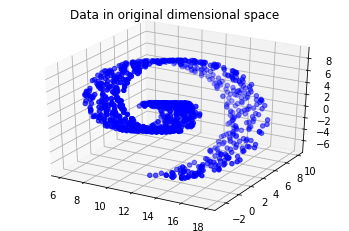

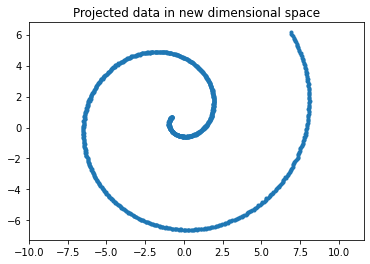

In [34]:
# MDS implement reduction to 2
mds = MDS(2)
mds.train(X)

# 在三維顯示投影結果
fig1 = plt.figure() #視窗1
fig1.canvas.set_window_title("3-dimension")
ax = plt.subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b') #原資料點
plt.title('Data in original dimensional space')

# 投影結果
fig2 = plt.figure() #視窗2
fig2.canvas.set_window_title("2-dimension")
plt.axis('equal')
plt.plot(mds.B[:, 0], mds.B[:, 1], '.') #投影點在新維度上座標
plt.title('Projected data in new dimensional space')

plt.show()

### Example2 - Torodial helix

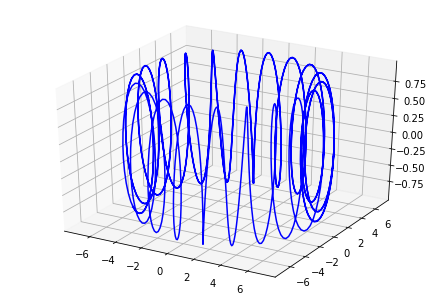

In [35]:
import math
def Helix(R, r, n):
  t = np.linspace(0, 10, 1000)
  x = (R + r * np.cos(n*t))*np.cos(t)
  y = (R + r * np.cos(n*t))*np.sin(t)
  z = r * np.sin(n*t)
  return np.array([x, y, z]).T
helix = Helix(6, 1, 20)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(helix[:, 0], helix[:, 1], helix[:, 2], c = 'b')

(1000, 2)


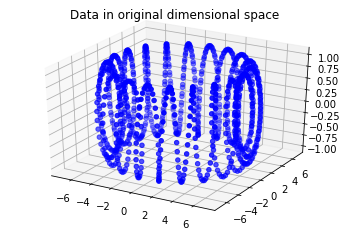

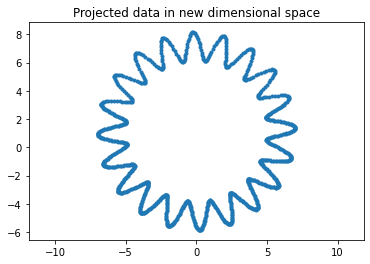

In [36]:
X = helix
# PCA implement reduction to 2-dim
mds = MDS(2)
mds.train(X)

# 在三維顯示投影結果
fig1 = plt.figure() #視窗1
fig1.canvas.set_window_title("3-dimension")
ax = plt.subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = 'b') #原資料點
plt.title('Data in original dimensional space')

# 投影結果
fig2 = plt.figure() #視窗2
fig2.canvas.set_window_title("2-dimension")
plt.axis('equal')
plt.plot(mds.B[:, 0], mds.B[:, 1], '.') #投影點在新維度上座標
plt.title('Projected data in new dimensional space')

plt.show()